In [1]:
#Raising jupiter notebook memory capacity
#jupyter notebook --NotbookApp.iopub_Data_Rate_Limit=1e10
#Note: standard is 1e6
#Source: 

In [2]:
import numpy as np
import pandas as pd #data wrangeling
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import os #for setting the working drectory

In [3]:
import pyramid

In [4]:
import pmdarima

In [5]:
from pmdarima import auto_arima

In [6]:
from statsmodels.tsa.arima_model import ARIMA

In [167]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [7]:
#Importing evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
#setting working directory
os.chdir("C:/Users/mah/Desktop/M5_Wallmart_Challenge")
os.getcwd()

'C:\\Users\\mah\\Desktop\\M5_Wallmart_Challenge'

In [54]:
#importing raw data
sales_train_validation = pd.read_csv("sales_train_validation.csv") #Sales per Item
calendar = pd.read_csv("calendar.csv", parse_dates=['date']) #Calender Information
sell_prices = pd.read_csv("sell_prices.csv") #Prices per Item

In [87]:
#reading in the revenue_CA_1_FOODS_day time series csv
revenue_CA_1_FOODS_day = pd.read_csv("revenue_CA_1_FOODS_day.csv", index_col='date')
#setting the index which was saved as a row back as the index

In [88]:
#revenue_CA_1_FOODS_day.index=pd.to_datetime(revenue_CA_1_FOODS_day.index)

In [89]:
revenue_CA_1_FOODS_day

,revenue
date,
2011-01-29,7240.65
2011-01-30,6705.51
2011-01-31,4584.85
2011-02-01,4965.46
2011-02-02,4368.07
...,...
2016-04-20,6938.53
2016-04-21,6824.21
2016-04-22,8226.64


In [90]:
#defining exogen variables data frame
#setting the date as the index
exog = pd.DataFrame({'date': revenue_CA_1_FOODS_day.index})

In [91]:
#turn to date variable
#Note: is needed to maek te variable the index in the nexxt step
#Doc: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
exog['date']=pd.to_datetime(exog['date'])

In [92]:
#defining the index as a date variable which will become relevant for subsequent computation
exog = exog.set_index(pd.PeriodIndex(exog['date'], freq='D'))

In [93]:
#Fourier Series for weekly and yearly seasonality
#N=The number of Sinus and Cosinus Terms that are included
#P=Cycle length, defined as 
#                            365.25 for yearly seasonality (due to leap years) 
#                            7 for weekly seasonality
#t=time index is defined as 
#                            the day of the year (0-365) for yearly seasonality
#                            the day of the week (0-6) for weekly seasonality
#to vsualize simply plot:
#dayofyear = pd.DataFrame({'d': exog.index.dayofweek})
#dayofyear.plot()
#dayofweek = pd.DataFrame({'d': exog.index.dayofweek})
#dayofweek.plot()

#yearly seasonality with N=10
#N=1
exog['yearly_sin365'] = np.sin(2 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365'] = np.cos(2 * np.pi * exog.index.dayofyear / 365.25)
#N=2
exog['yearly_sin365_2'] = np.sin(4 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_2'] = np.cos(4 * np.pi * exog.index.dayofyear / 365.25)
#N=3
exog['yearly_sin365_3'] = np.sin(6 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_3'] = np.cos(6 * np.pi * exog.index.dayofyear / 365.25)
#N=4
exog['yearly_sin365_4'] = np.sin(8 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_4'] = np.cos(8 * np.pi * exog.index.dayofyear / 365.25)
#N=5
exog['yearly_sin365_5'] = np.sin(10 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_5'] = np.cos(10 * np.pi * exog.index.dayofyear / 365.25)
#N=6
exog['yearly_sin365_6'] = np.sin(12 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_6'] = np.cos(12 * np.pi * exog.index.dayofyear / 365.25)
#N=7
exog['yearly_sin365_7'] = np.sin(14 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_7'] = np.cos(14 * np.pi * exog.index.dayofyear / 365.25)
#N=8
exog['yearly_sin365_8'] = np.sin(16 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_8'] = np.cos(16 * np.pi * exog.index.dayofyear / 365.25)
#N=9
exog['yearly_sin365_9'] = np.sin(18 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_9'] = np.cos(18 * np.pi * exog.index.dayofyear / 365.25)
#N=10
exog['yearly_sin365_10'] = np.sin(20 * np.pi * exog.index.dayofyear / 365.25)
exog['yearly_cos365_10'] = np.cos(20 * np.pi * exog.index.dayofyear / 365.25)


#weekly seasonality with N=3
#N=1
exog['weekly_sin365'] = np.sin(2 * np.pi * exog.index.dayofweek / 7)
exog['weekly_cos365'] = np.cos(2 * np.pi * exog.index.dayofweek / 7)
#N=2
exog['weekly_sin365_2'] = np.sin(4 * np.pi * exog.index.dayofweek / 7)
exog['weekly_cos365_2'] = np.cos(4 * np.pi * exog.index.dayofweek / 7)
#N=3
exog['weekly_sin365_3'] = np.sin(6 * np.pi * exog.index.dayofweek / 7)
exog['weekly_cos365_3'] = np.cos(6 * np.pi * exog.index.dayofweek / 7)

#linear trend
exog['linear_trend'] = [i for i in range(len(revenue_CA_1_FOODS_day))]

#drop the date variable as it is no longer needed and should not be used as exogen variable
exog = exog.drop(columns=['date'])

In [94]:
#Adding events to the exogen variables

#SNAP Food assistance program days in Califonia
#Extract snap column
Snap = calendar.loc[:1912,'snap_CA']
#Create Dummy variable by setting all NaN to 0
Snap = Snap.replace('None', 0)
#add to exogen
exog['SNAP_CA'] = np.array(Snap)

In [95]:
#defining an array with all possible holiday categories
#Note: event 2 only contains holidays if two holidays happen to have the same date
#Thus all holidays are included in event 1
events = calendar['event_type_1'].unique()
#omitting nan from the possible holidays
events = np.delete(events,[0,5])
#Note: need to delete first and last index

#defining a DataFrame for the Dummys of all Holiday typs
exog_cate = pd.DataFrame(0, index=np.arange(len(calendar)), columns=events)


C:\Users\mah\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


In [96]:
#Definition of dummy variables for each category of holidays
#Only equal one if the day is a holiday day
for i in events:
    for d in range(0,len(calendar)): 
        if ((calendar.loc[d,'event_type_1'] == i) or (calendar.loc[d,'event_type_2'] == i)):
            exog_cate.loc[d,i]=1
        else:
            exog_cate.loc[d,i]=0
            
            

In [97]:
#Note: to combine/merge the individual holiday data with the other exogenous data they need a common variable or index
#Thus i put the date variable into the exg_holi data prior to mergin on date
exog_cate['date']=calendar['date']
#then i define the index as the date variable so that the indices of both data sets are identical
exog_cate = exog_cate.set_index(pd.PeriodIndex(exog_cate['date'], freq='D'))
#drop the date variable as it is no longer needed and should not be used as exogen variable
exog_cate = exog_cate.drop(columns=['date'])

In [98]:
#merging the data sets
#Note: by setting the indexes for both sets to true I merge by the index
exog_category = pd.merge(exog,exog_cate, left_index=True, right_index=True)

In [ ]:
#creating a price index

In [99]:
exog_category

,yearly_sin365,yearly_cos365,yearly_sin365_2,yearly_cos365_2,yearly_sin365_3,yearly_cos365_3,yearly_sin365_4,yearly_cos365_4,yearly_sin365_5,yearly_cos365_5,...,weekly_sin365_2,weekly_cos365_2,weekly_sin365_3,weekly_cos365_3,linear_trend,SNAP_CA,Sporting,Cultural,National,Religious
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0.478434,0.878124,0.840248,0.542202,0.997250,0.074117,0.911169,-0.412034,0.602988,-0.797750,...,0.433884,-0.900969,0.781831,0.623490,0,0,0,0,0,0
2011-01-30,0.493468,0.869764,0.858402,0.512978,0.999745,0.022576,0.880683,-0.473706,0.532227,-0.846602,...,-0.974928,-0.222521,-0.433884,-0.900969,1,0,0,0,0,0
2011-01-31,0.508356,0.861147,0.875539,0.483147,0.999579,-0.029025,0.846029,-0.533137,0.457531,-0.889193,...,0.000000,1.000000,0.000000,1.000000,2,0,0,0,0,0
2011-02-01,0.523094,0.852275,0.891640,0.452745,0.996751,-0.080549,0.807371,-0.590044,0.379453,-0.925211,...,0.974928,-0.222521,0.433884,-0.900969,3,1,0,0,0,0
2011-02-02,0.537677,0.843151,0.906686,0.421806,0.991269,-0.131859,0.764891,-0.644159,0.298569,-0.954388,...,-0.433884,-0.900969,-0.781831,0.623490,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0.943196,-0.332235,-0.626727,-0.779239,-0.526755,0.850017,0.976740,0.214427,-0.122261,-0.992498,...,-0.433884,-0.900969,-0.781831,0.623490,1908,0,0,0,0,0
2016-04-21,0.937342,-0.348411,-0.653160,-0.757220,-0.482206,0.876058,0.989172,0.146764,-0.207070,-0.978326,...,-0.781831,0.623490,0.974928,-0.222521,1909,0,0,0,0,0
2016-04-22,0.931210,-0.364483,-0.678820,-0.734304,-0.436373,0.899766,0.996922,0.078406,-0.290349,-0.956921,...,0.781831,0.623490,-0.974928,-0.222521,1910,0,0,0,0,0


In [100]:
#Define training and testing data set
#for exogenous variables
exog_to_train = exog_category.iloc[:(len(revenue_CA_1_FOODS_day)-31)]
exog_to_test = exog_category.iloc[(len(revenue_CA_1_FOODS_day)-31):]
#for dependent variables
revenue_CA_1_FOODS_day_to_train = revenue_CA_1_FOODS_day.iloc[:(len(revenue_CA_1_FOODS_day)-31)]
revenue_CA_1_FOODS_day_to_test = revenue_CA_1_FOODS_day.iloc[(len(revenue_CA_1_FOODS_day)-31):]

In [101]:
#Fitting the model
#Important note: intercept can be included into the function with trend='c'
#But a real linear trend has to be included into the exogen variables
#Source: Comments in https://stackoverflow.com/questions/34001082/arima-trend-nc-or-c-in-python
model = auto_arima(y=revenue_CA_1_FOODS_day_to_train, 
                              exogenous=exog_to_train,
                              with_intercept=True,
                              trend=None,
                              seasonal=False,
                              return_valid_fits=False, #If true returns other valid ARIMA specifications
                              information_criterion='aic',
                              stepwise=True, #uses the  stepwise algorithm outlined in Hyndman and Khandakar (2008) 
                              Trace=True) #print print status on the fits, thus debugging information

C:\Users\mah\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\mah\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\mah\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\mah\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\mah\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retva

In [102]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1882
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -15067.305
Date:                Tue, 04 Aug 2020   AIC                          30204.611
Time:                        11:05:46   BIC                          30398.514
Sample:                    01-29-2011   HQIC                         30276.027
                         - 03-24-2016                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         1798.2192    112.810     15.940      0.000    1577.116    2019.323
yearly_sin365      190.4451     86.758      2.195      0.028      20.402     360.488
yearly_cos365     -582.1653 

In [103]:
#Creating model forecast
#Inputs: model to predict, forecasting period, exogenous varables for the respective period
#Note: Turn on return confidence intervals
forecast = model.predict(n_periods=31, 
                         exogenous=exog_to_test, 
                         return_conf_int=True)

In [104]:
#Creating daily time index for the forecasting period
#Inputs: training data, forecasting period, frequency of forecasts (D=daily)
#Note: is needed in the next steps to index the point and confidence interval series
forecast_index = pd.date_range(revenue_CA_1_FOODS_day_to_train.index[revenue_CA_1_FOODS_day_to_train.shape[0]-1], 
                               periods=31, 
                               freq="D")

In [134]:
#Extracting point forecast and creating an indexed series
forecast_point = pd.Series(forecast[0], index=revenue_CA_1_FOODS_day_to_test.index)

In [135]:
#Extracting upper and lower 95% confidence intervals of the forecast and creating indexed series
lower_confidence_boundary = pd.Series([row[0] for row in forecast[1]],
                         index=revenue_CA_1_FOODS_day_to_test.index)
upper_confidence_boundary = pd.Series([row[1] for row in forecast[1]],
                         index=revenue_CA_1_FOODS_day_to_test.index)

In [136]:
#Extract fitted values
#https://stackoverflow.com/questions/52201229/fitted-values-from-arima-in-python
#Trick: this is simply done by predicting the with the exogen training data
#       But you have to use predict_in_sample function
fitted = model.predict_in_sample(n_periods=len(exog_to_train), 
                                         exogenous=exog_to_train,
                                         return_conf_int=True)
fitted_point = pd.Series(fitted[0], index=revenue_CA_1_FOODS_day_to_train.index)

In [144]:
#Important Lessons Learned
#If you want to plot multiple series together then you have to have all inices which denote the date as date variables
#Otherwise it doesn't work as the programm cant fix a common x-axis
upper_confidence_boundary.index=pd.to_datetime(upper_confidence_boundary.index)
lower_confidence_boundary.index=pd.to_datetime(lower_confidence_boundary.index)
revenue_CA_1_FOODS_day.index=pd.to_datetime(revenue_CA_1_FOODS_day.index)
fitted_point.index=pd.to_datetime(fitted_point.index)
forecast_point.index=pd.to_datetime(forecast_point.index)

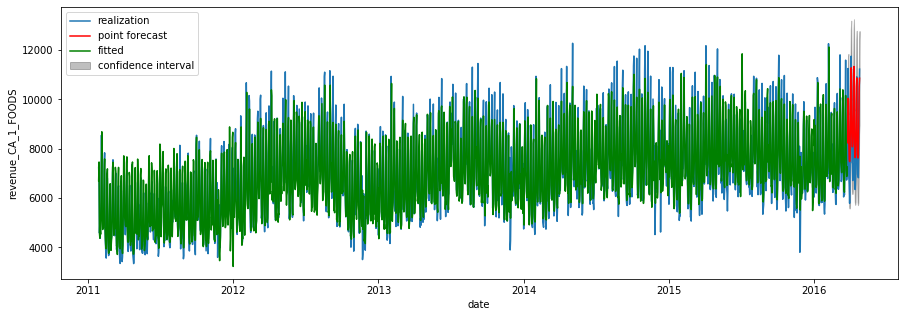

In [145]:
#Plot the results
plt.figure(figsize=(15, 5))
plt.plot(revenue_CA_1_FOODS_day)
plt.plot(forecast_point, color="red")
plt.plot(fitted_point, color="green")
plt.xlabel("date")
plt.ylabel("revenue_CA_1_FOODS")
plt.fill_between(lower_confidence_boundary.index, 
                     lower_confidence_boundary, 
                     upper_confidence_boundary, 
                     color="k", 
                     alpha=0.25)
plt.legend(("realization", "point forecast", "fitted", "confidence interval"),  
               loc="upper left")
plt.show()

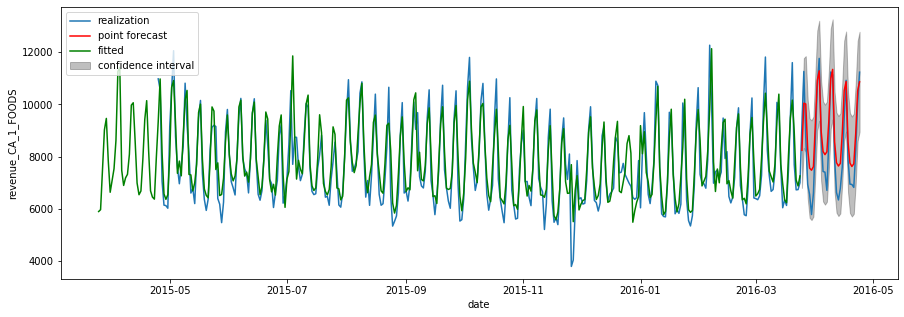

In [155]:
#Plot the results for the last year only
plt.figure(figsize=(15, 5))
plt.plot(revenue_CA_1_FOODS_day[len(revenue_CA_1_FOODS_day)-366:])
#Here I take alle observations past (the : is after the number) the last observation (len(...)) minus 366 days (leap year)
#This results in only the observations of the last year
plt.plot(forecast_point, color="red")
plt.plot(fitted_point[len(fitted_point)-366:], color="green")
#Same thing has to be done for the fitted values
#hoever not for the forecast as it is only for the last periods (naturally)
plt.xlabel("date")
plt.ylabel("revenue_CA_1_FOODS")
plt.fill_between(lower_confidence_boundary.index, 
                     lower_confidence_boundary, 
                     upper_confidence_boundary, 
                     color="k", 
                     alpha=0.25)
plt.legend(("realization", "point forecast", "fitted", "confidence interval"),  
               loc="upper left")
plt.show()

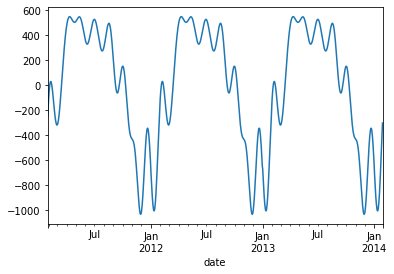

In [161]:
#Plotting individual seasonal components seperatly

#Yearly seasonality

#extracting the coefficients for the yearly fourier series components and multiplying them with the components values
yearly_seasonality = model.params()[1:21] * exog.loc[:,'yearly_sin365':'yearly_cos365_10']
#summing up each row to get the seasonal effect value per time point
yearly_seasonality = yearly_seasonality.sum(axis=1)
#plotting it for three years as the pattern remains the same
yearly_seasonality[0:1096].plot()

In [162]:
yearly_seasonality

date
2011-01-29   -247.327205
2011-01-30   -196.120233
2011-01-31   -149.184986
2011-02-01   -107.054894
2011-02-02    -70.161417
                 ...    
2016-04-20    515.999337
2016-04-21    512.471941
2016-04-22    509.486672
2016-04-23    507.139658
2016-04-24    505.505882
Freq: D, Length: 1913, dtype: float64

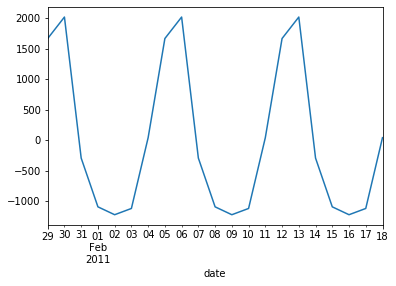

In [163]:
#Monthly seasonality

#extracting the coefficients for the monthly fourier series components and multiplying them with the components values
monthly_seasonality = model.params()[21:27] *exog.loc[:,'weekly_sin365':'weekly_cos365_3']
#summing up each row to get the seasonal effect value per time point
monthly_seasonality = monthly_seasonality.sum(axis=1)
#plotting it
#Note: only plotting the first 3 weeks as the pattern remains the same
monthly_seasonality[0:21].plot()

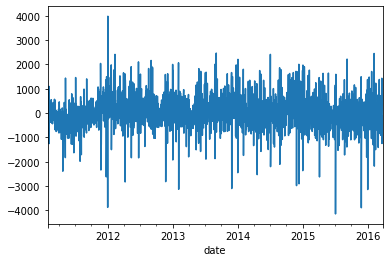

In [164]:
#plotting fittted errors and residuals
model.resid().plot()

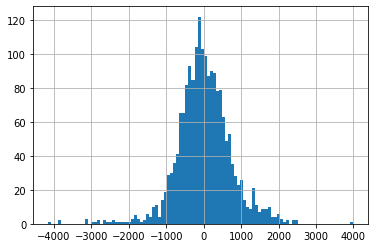

In [165]:
#Histogram of fitted errors and residuals shows approximately a bell curve
#Note there are ouliers into the negative (Christmas)
model.resid().hist(bins=100) #bins: defnes the number of bars

#https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

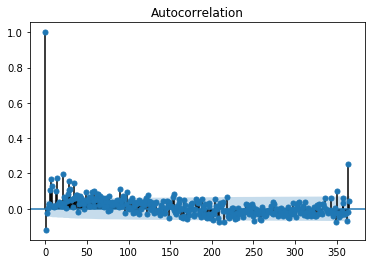

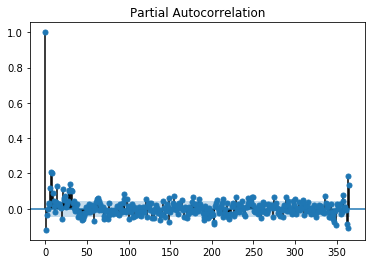

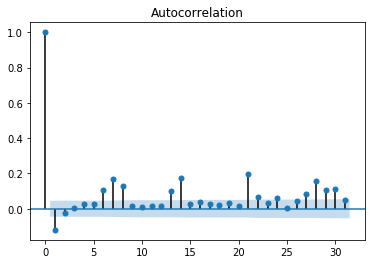

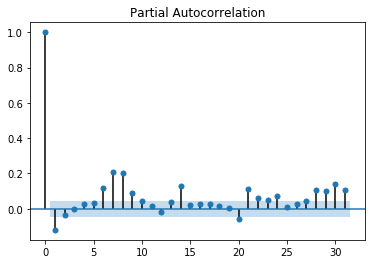

In [168]:
#ACf of residuals
plot_acf(model.resid(), lags=365)
plot_pacf(model.resid(), lags=365)
plot_acf(model.resid(), lags=31)
plot_pacf(model.resid(), lags=31)
plt.show()
#Note: if one includes "plt.show()" after a graph command it only shows the grap once

#Question: dont know how to include the plot_acf from statmodels into matplotlib
# That way I could make the graph larger and smaller

#Information from the plot for now:
#we see that every 7 days are significant in ACF and PACF
#Thus its seems as if weekly seasonality is not well accounted for or maybe their is monthely seasonality, not sure
#Idea: new seasonality at 28 day range or more sin and cos into the weekly seasonality
#Or just weekly Autocorrelation, maybe add a 7 day AR lag
#furthermore we have the one year lag also significant, suggesting that yearly seasonality is not well accounted for
#Or just yearly Autocorrelation, maybe add a 365 day AR lag

In [169]:
#H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process).
#H1: The data are not independently distributed; they exhibit serial correlation.
print(sm.stats.acorr_ljungbox(model.resid(), lags=[10], return_df=True))
#print(sm.stats.acorr_ljungbox(fit_errors, lags=[10], return_df=True)) #no necessary anymore
#Errors are not independent errors

#The Test:
#https://en.wikipedia.org/wiki/Ljung–Box_test
#https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html

       lb_stat     lb_pvalue
10  139.422731  5.533694e-25


In [170]:
#defining the evaluation metrics
#from: https://mlflow.org/docs/latest/tutorials-and-examples/tutorial.html
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [171]:
#creating a table with the forecasting evaluation metric values for all four models
#each row contains the evaluation metrics for a model
#the loop runs threw range of 3 as we have three metrics (0,1,2)
fc_acc=pd.DataFrame(index=['rmse', 'mae', 'r2'])
fc_acc["Additive"]       = [eval_metrics(revenue_CA_1_FOODS_day_to_test, forecast_point)[a] for a in range(0,3)]

In [172]:
fc_acc

,Additive
rmse,905.612235
mae,805.900010
r2,0.739183
